In [1]:
# General
import warnings
import numpy as np
import pandas as pd
warnings.filterwarnings("ignore")

# Visuals 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm
import missingno as msno

# Metrics
from scipy.stats import skew
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

# Preparation
from scipy.stats import boxcox
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# ML models
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV 
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold

# DL models
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.neural_network import MLPClassifier

In [20]:
df_train = pd.read_csv("train.csv") # Shape (42000, 785)
df_test_1 = pd.read_csv("test.csv") # Shape (28000, 784)
df_train_1 = df_train.drop(columns=['label'],axis = 1) # Shape (42000, 784)
df_train_label = df_train['label'] # Shape (42000,)

In [21]:
df_train_1[df_train_1 < 91] = 0
df_train_1[df_train_1 > 90] = 1

In [22]:
sum_columns = []
for i in range(0, len(df_train_1.columns), 2):
    sum_column = df_train_1.iloc[:, i] + df_train_1.iloc[:, i + 1]
    sum_columns.append(sum_column)

df_train_111 = pd.concat(sum_columns, axis=1) # Shape (42000, 392)

sum_columns = []

for i in range(0, len(df_train_111.columns) // 2):
    sum_column = df_train_111.iloc[:, i] + df_train_111.iloc[:, i + len(df_train_111.columns) // 2]
    sum_columns.append(sum_column)

df_train_1111 = pd.concat(sum_columns, axis=1) # Shape (42000, 196)

In [23]:
df_train_1111[df_train_1111 > 0] = 1

In [24]:
df_train_1111_0 = pd.concat([df_train_1111, df_train_label], axis=1) # Shape (42000, 197)

In [25]:
df_train_121 = df_train_1.iloc[:, ::2] # Shape (42000, 392)
df_train_122 = df_train_1.iloc[:, 1::2] # Shape (42000, 392)

In [26]:
column_indexes_df1 = list(range(14)) + list(range(28, 42)) + list(range(56, 70)) + list(range(84, 98)) + list(range(112, 126))+ list(range(140, 154)) + list(range(168, 182)) + list(range(196, 210)) + list(range(224, 238)) + list(range(252, 266)) + list(range(280, 294)) + list(range(308, 322)) + list(range(336, 350)) + list(range(364, 378))# Column indexes for df1
column_indexes_df2 = list(range(14, 28)) + list(range(42, 56)) + list(range(70, 84)) + list(range(98, 112)) + list(range(126, 140)) + list(range(154, 168)) + list(range(182, 196)) + list(range(210, 224)) + list(range(238, 252)) + list(range(266, 280)) + list(range(294, 308)) + list(range(322, 336)) + list(range(350, 364)) + list(range(378, 392)) # Column indexes for df2

df_train_1211 = df_train_121.iloc[:, column_indexes_df1]
df_train_1212 = df_train_121.iloc[:, column_indexes_df2]

In [27]:
column_indexes_df1 = list(range(14)) + list(range(28, 42)) + list(range(56, 70)) + list(range(84, 98)) + list(range(112, 126))+ list(range(140, 154)) + list(range(168, 182)) + list(range(196, 210)) + list(range(224, 238)) + list(range(252, 266)) + list(range(280, 294)) + list(range(308, 322)) + list(range(336, 350)) + list(range(364, 378))# Column indexes for df1
column_indexes_df2 = list(range(14, 28)) + list(range(42, 56)) + list(range(70, 84)) + list(range(98, 112)) + list(range(126, 140)) + list(range(154, 168)) + list(range(182, 196)) + list(range(210, 224)) + list(range(238, 252)) + list(range(266, 280)) + list(range(294, 308)) + list(range(322, 336)) + list(range(350, 364)) + list(range(378, 392)) # Column indexes for df2

df_train_1221 = df_train_122.iloc[:, column_indexes_df1]
df_train_1222 = df_train_122.iloc[:, column_indexes_df2]

In [ ]:
df_train_111
df_train_1111
df_train_121
df_train_122
df_train_1211
df_train_1212

In [18]:
df_train_1.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 784 columns]

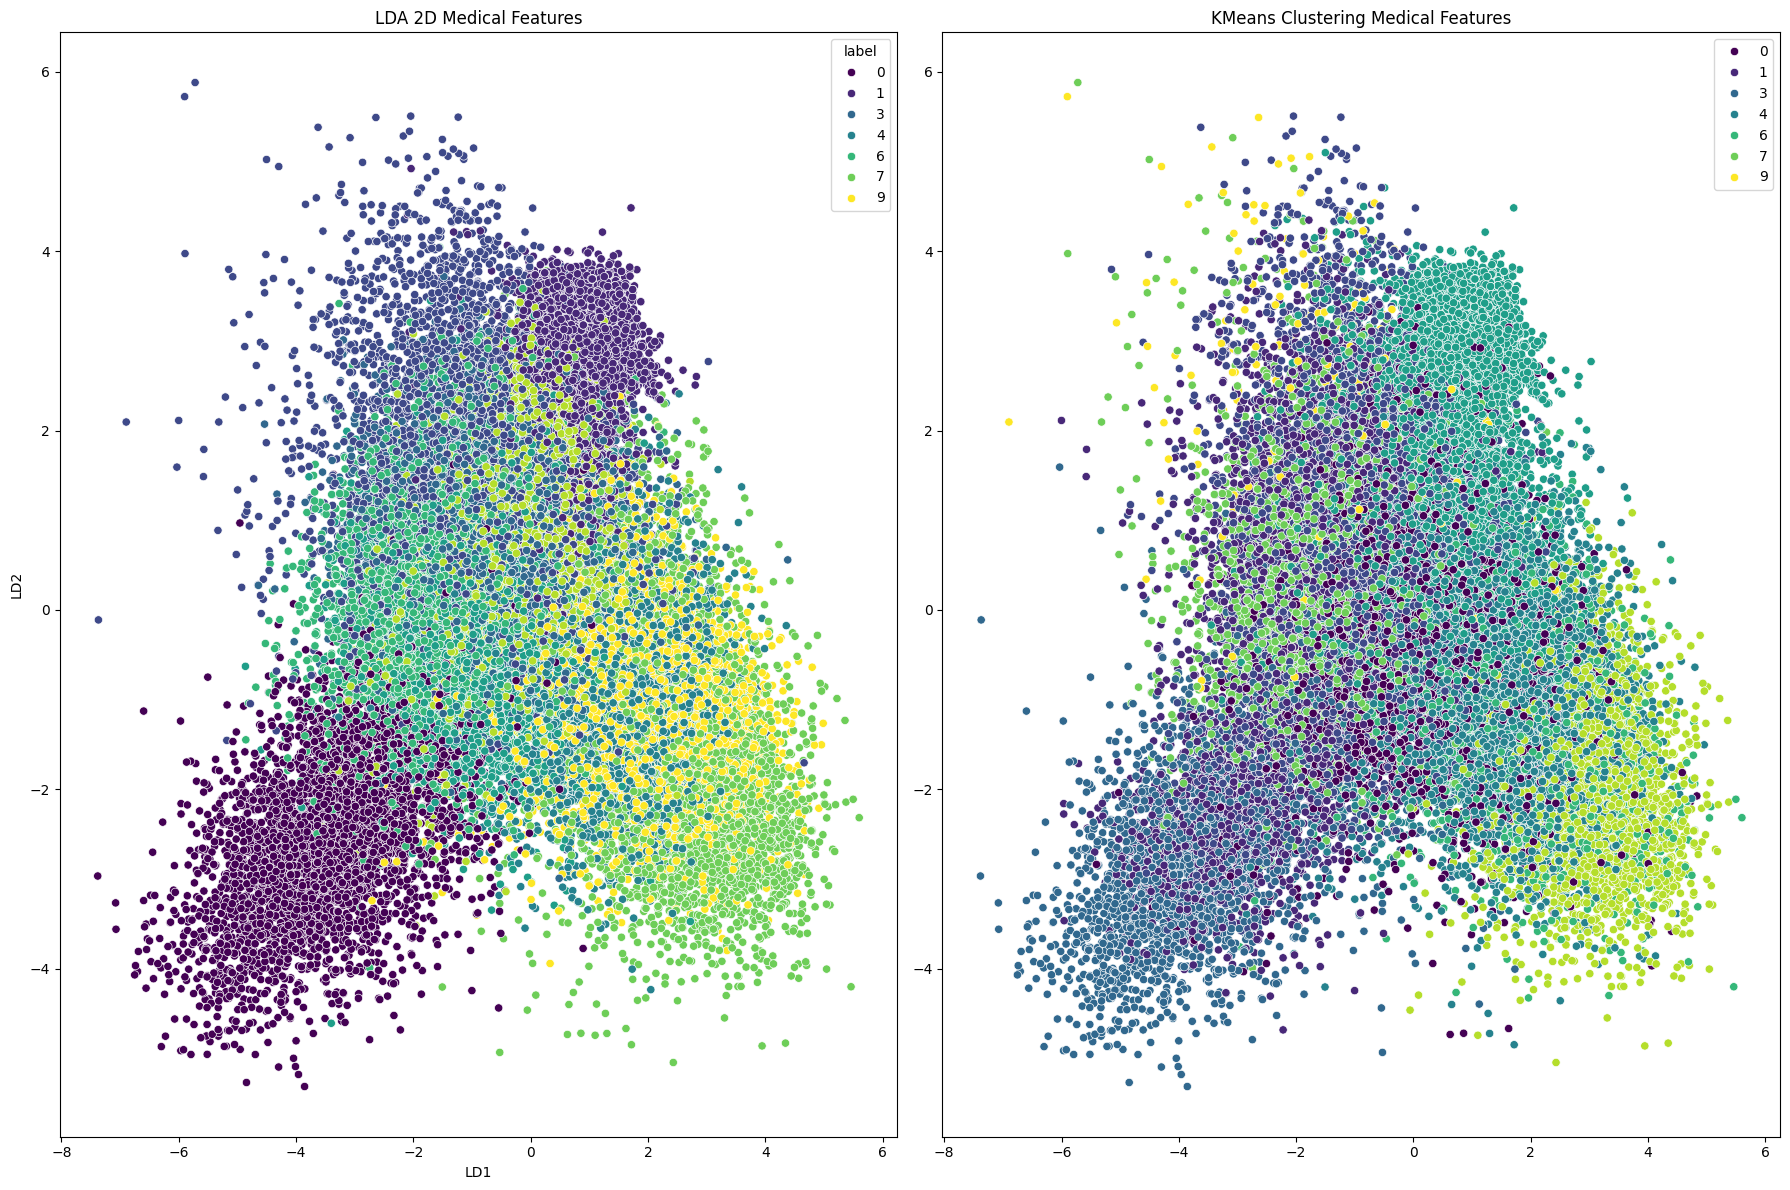

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(18, 12))

# Medical Features - LDA
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_train_1221)
lda = LDA(n_components=2)
lda_components = lda.fit_transform(scaled_features, df['label'])
lda_df = pd.DataFrame(data=lda_components, columns=['LD1', 'LD2'])
final_lda_df = pd.concat([lda_df, df['label']], axis=1)
sns.scatterplot(data=final_lda_df, x='LD1', y='LD2', hue='label', palette='viridis', ax=axs[0])
axs[0].set_title('LDA 2D Medical Features')

# KMeans Clustering - Medical Features
kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
sns.scatterplot(x=lda_components[:, 0], y=lda_components[:, 1], hue=clusters, palette='viridis', ax=axs[1])
axs[1].set_title('KMeans Clustering Medical Features')

plt.tight_layout()
plt.show()

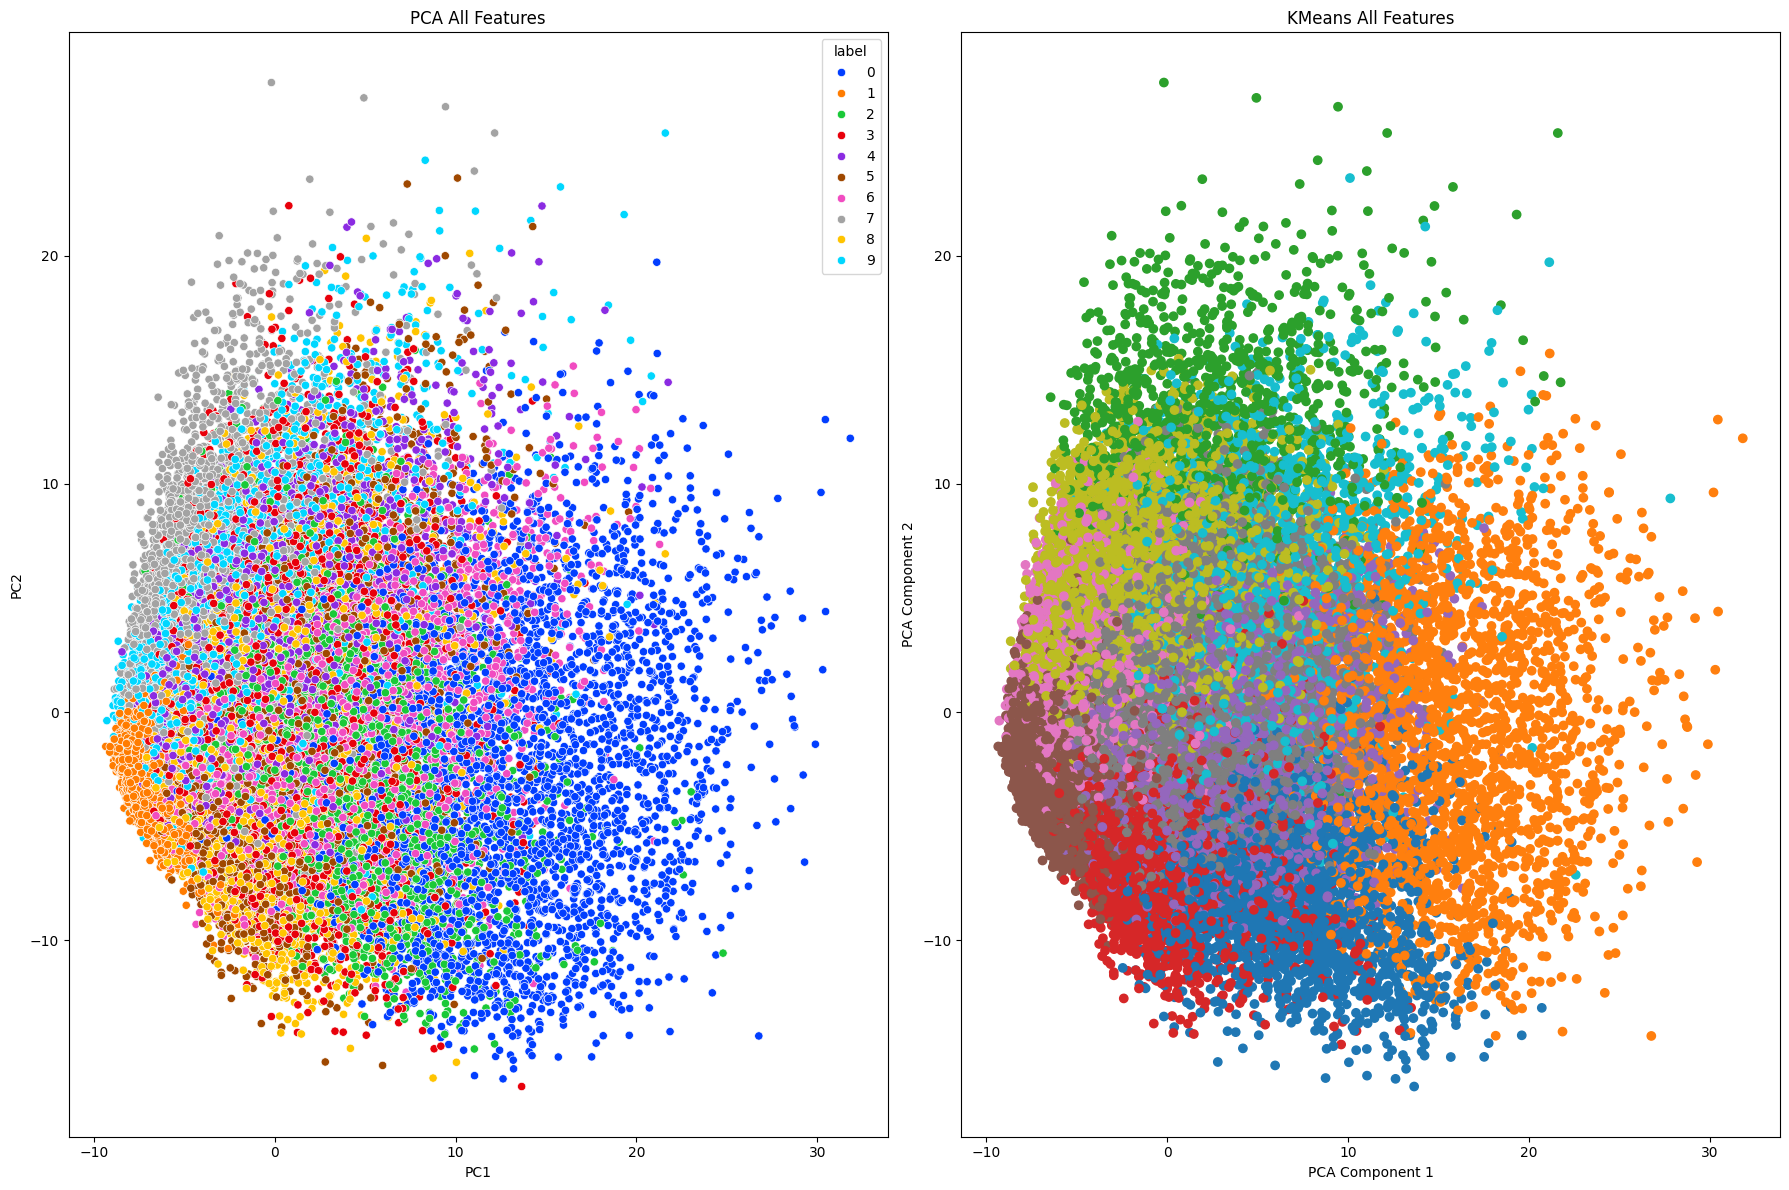

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(18, 12))
df_target = df['label']
scaler = StandardScaler()

def plot_pca_and_kmeans(ax_pca, ax_kmeans, features, target, title):
    scaled_features = scaler.fit_transform(features)
    
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(scaled_features)
    principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
    final_df = pd.concat([principal_df, target], axis=1)
    
    sns.scatterplot(data=final_df, x='PC1', y='PC2', hue=target.name, palette='bright', ax=ax_pca)
    ax_pca.set_title(f'PCA {title}')
    
    kmeans = KMeans(n_clusters=10, random_state=42)
    clusters = kmeans.fit_predict(scaled_features)
    
    ax_kmeans.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='tab10')
    ax_kmeans.set_title(f'KMeans {title}')
    ax_kmeans.set_xlabel('PCA Component 1')
    ax_kmeans.set_ylabel('PCA Component 2')

plot_pca_and_kmeans(axs[0], axs[1], df.drop(columns=['label']), df_target, 'All Features')

plt.tight_layout()
plt.show()

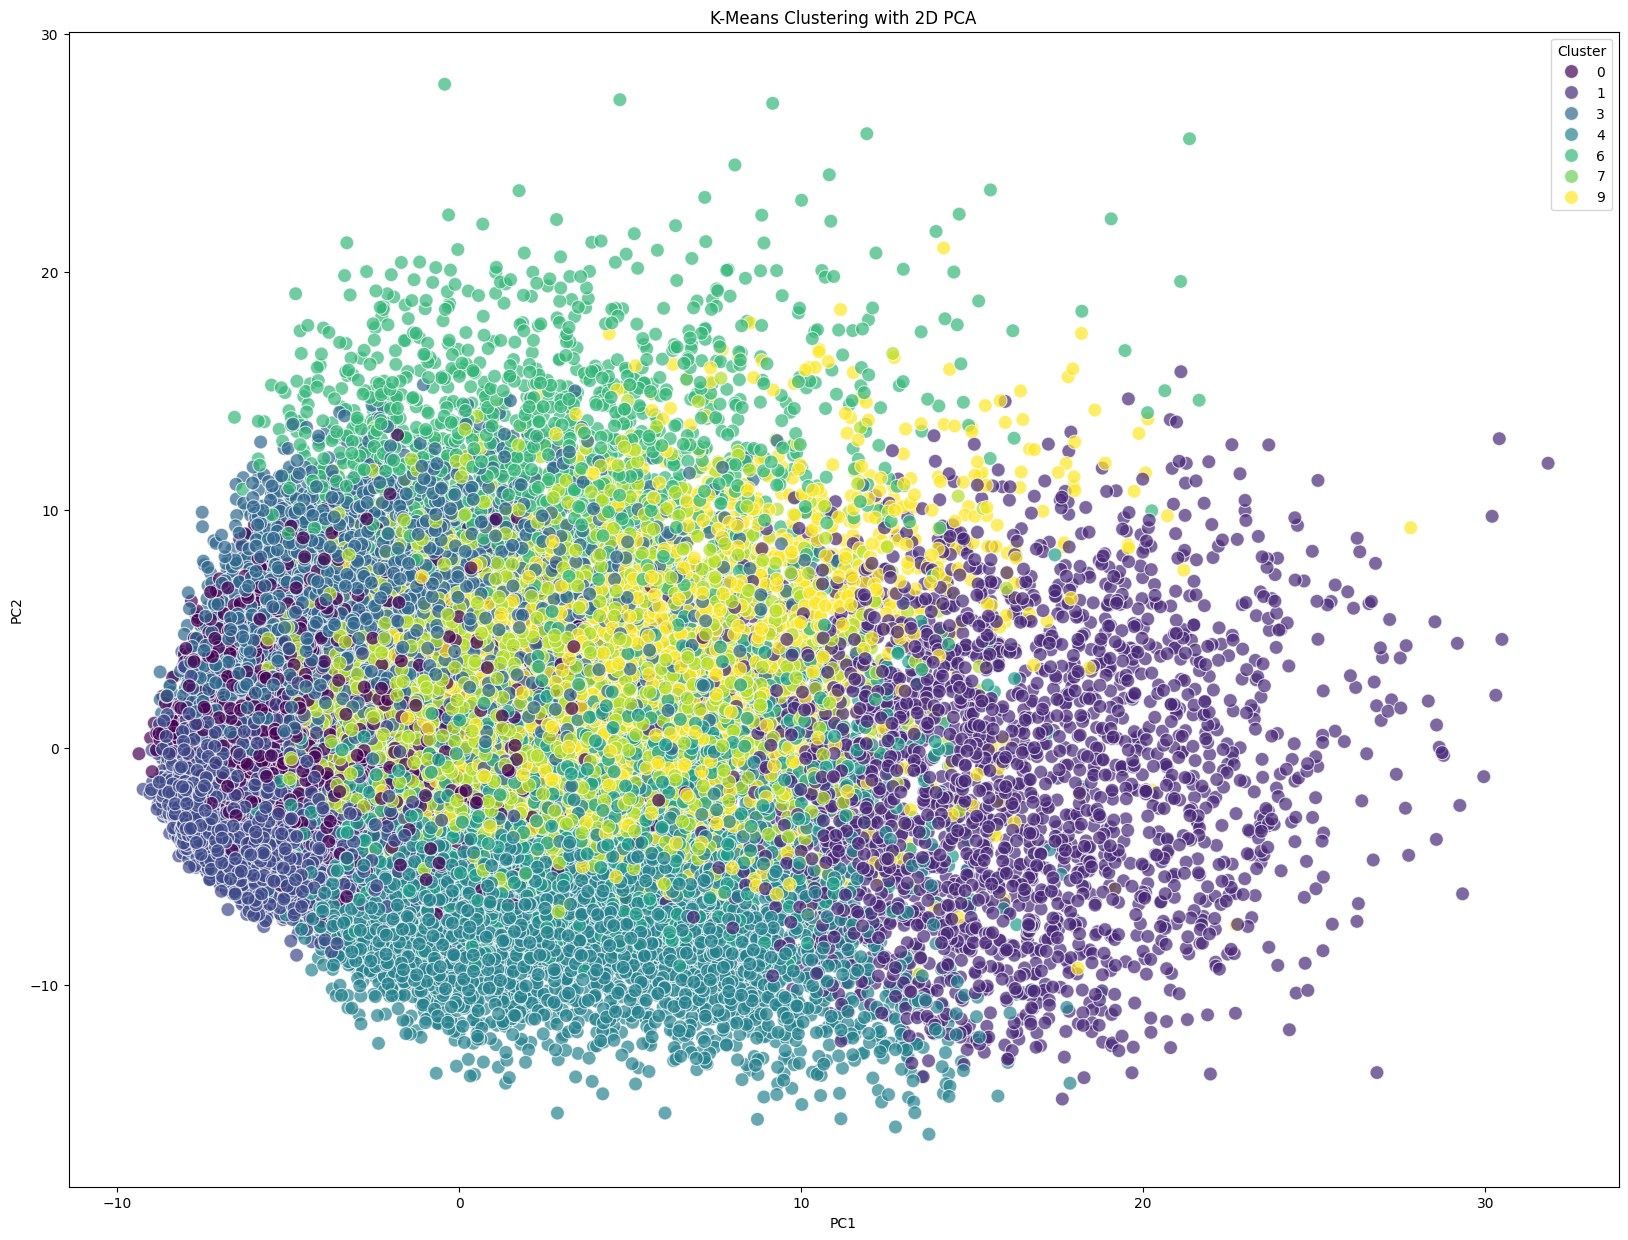

Silhouette Score: 0.009155392592763446


In [12]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

df_with_clusters = pd.DataFrame(df_scaled, columns=df.columns)
df_with_clusters['Cluster'] = clusters

pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

plt.figure(figsize=(20, 15))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='viridis', alpha=0.7, s=100)
plt.title('K-Means Clustering with 2D PCA')
plt.show()

silhouette_avg = silhouette_score(df_scaled, clusters)
print(f'Silhouette Score: {silhouette_avg}')

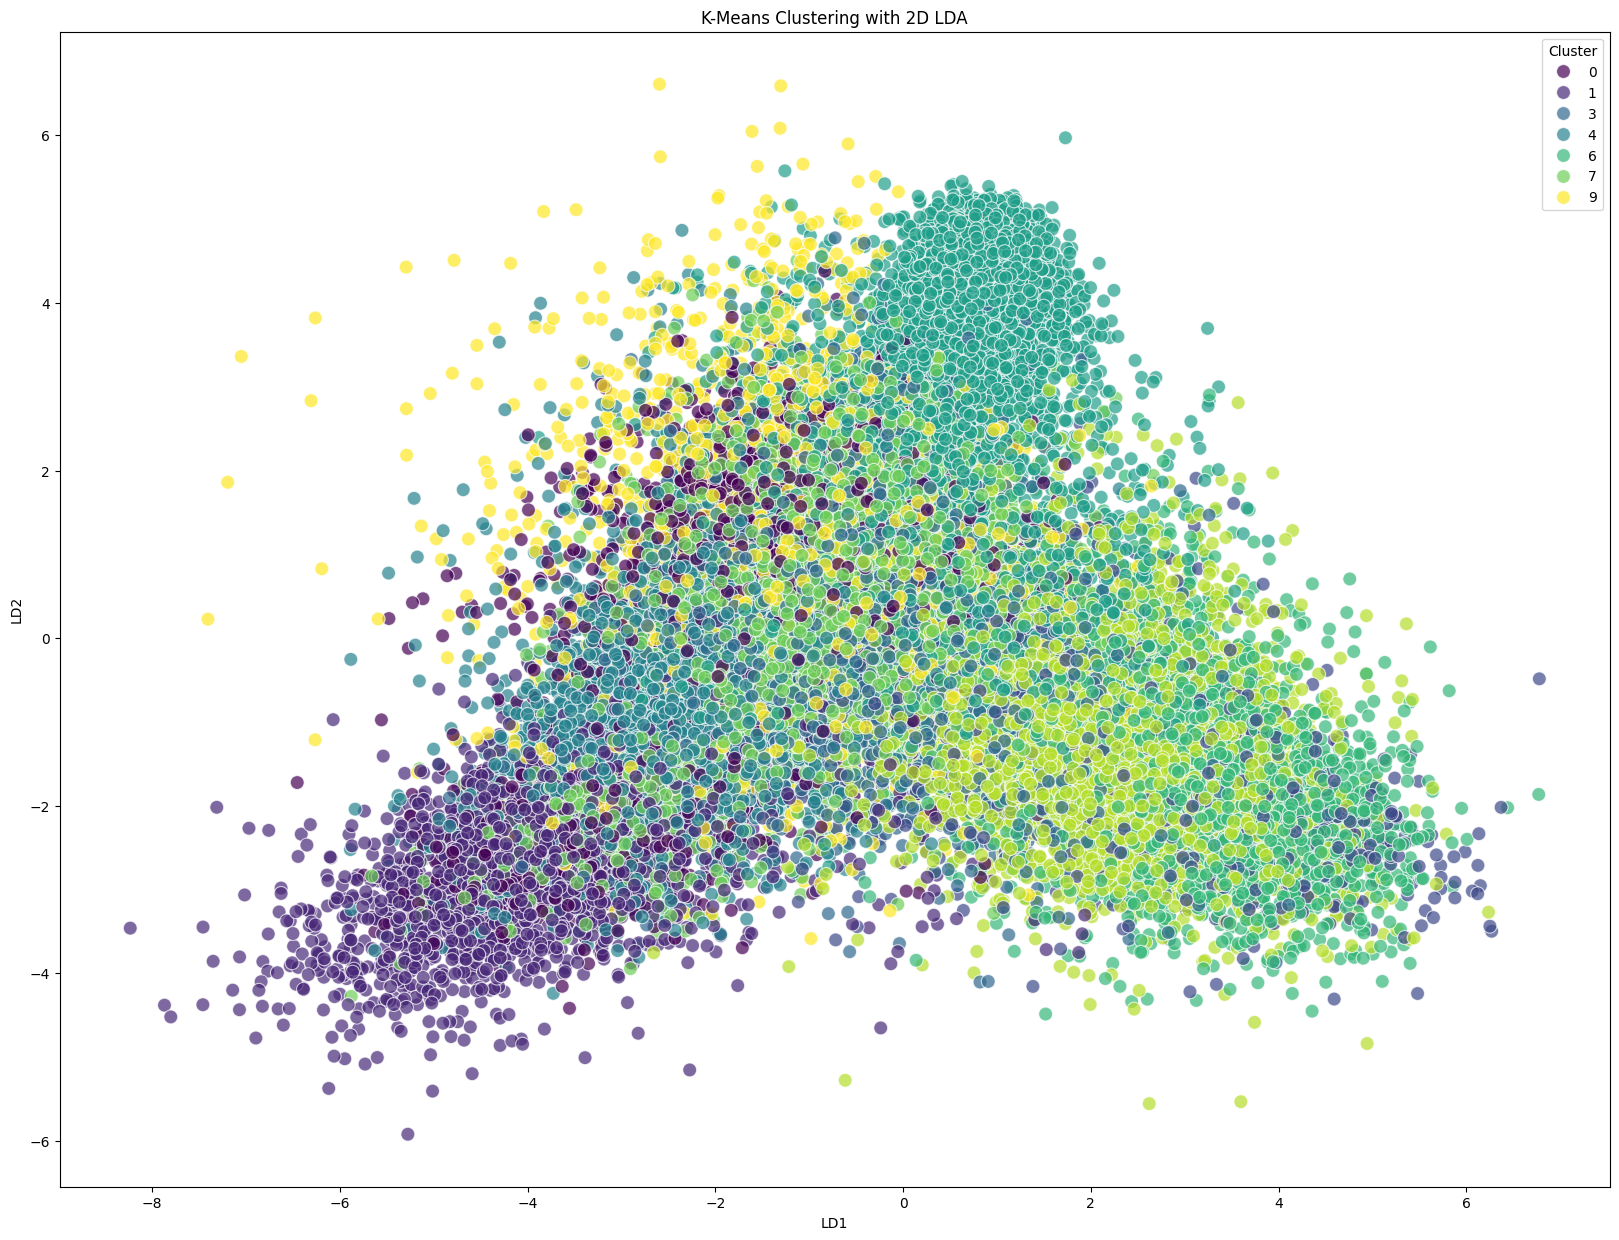

Silhouette Score: 0.007471406372944637


In [14]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop(columns=['label']))

k = 10
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df_scaled)
clusters = kmeans.predict(df_scaled)
df['Cluster'] = clusters

lda = LDA(n_components=2)
lda_components = lda.fit_transform(df_scaled, df['label'])
lda_df = pd.DataFrame(data=lda_components, columns=['LD1', 'LD2'])
lda_df['Cluster'] = clusters

plt.figure(figsize=(20, 15))
sns.scatterplot(data=lda_df, x='LD1', y='LD2', hue='Cluster', palette='viridis', alpha=0.7, s=100)
plt.title('K-Means Clustering with 2D LDA')
plt.show()

silhouette_avg = silhouette_score(df_scaled, clusters)
print(f'Silhouette Score: {silhouette_avg}')

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

X = df_train_1
y = df_train_label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Normalize pixel values
X_train, X_test = X_train / 255.0, X_test / 255.0

# Reshape data to fit model
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile and train model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")


In [30]:
pip install tensorflow

  Using cached tensorflow-2.16.1-cp39-cp39-macosx_10_15_x86_64.whl.metadata (4.1 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.5.4-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached h5py-3.11.0-cp39-cp39-macosx_10_9_x86_64.whl.metadata (2.5 kB)
  Using cached libclang-18.1.1-py2.py3-none-macosx_10_9_x86_64.whl.metadata (5.2 kB)
  Using cached ml_dtypes-0.3.2-cp39-cp39-macosx_10_9_universal2.whl.metadata (20 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached protobuf-4.25.3-cp37-abi3-macosx_10_9_universal2.whl.metadata (541 bytes)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached wrapt-1.16.0-cp39-cp39-macosx_10_9_x86_64.whl.metadata (6.6 kB)
  Using cached tensor